In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
files.upload();

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train = pd.read_csv('train.csv')
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [ ]:
column_select = train.columns.tolist()
column_num_to_save = [0,1,2, 3, 5, 6, 13, 14, 15, 22, 24, 28, 29, 31, 34, 40, 49, 51, 52, 53]
new_column_list = []
for num in column_num_to_save:
  new_column_list.append(column_select[num])

In [ ]:
df = train[new_column_list]

In [ ]:
df = df.drop(columns = ['ID'])
df

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
0,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


In [ ]:
df.Y_LABEL.value_counts(normalize = True)

0    0.914651
1    0.085349
Name: Y_LABEL, dtype: float64

In [ ]:
df.isnull().sum()

COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
Y_LABEL                0
dtype: int64

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 671 kB/s 


In [ ]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 15.4 MB/s 
     |████████████████████████████████| 102 kB 11.5 MB/s 
     |████████████████████████████████| 3.1 MB 67.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 696 kB 63.0 MB/s 
     |████████████████████████████████| 303 kB 55.5 MB/s 
     |████████████████████████████████| 296 kB 46.7 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=3f362fcea9283a99473941e8e2b1b403f7fb02901fe911ed720e3bf3f55cb23e
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: requests
    Found existing instal

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [ ]:
target = 'Y_LABEL'
train, val = train_test_split(df, test_size = 0.2, stratify = df[target])

In [ ]:
X_train = train.drop(columns = [target])
y_train = train[target]
X_val = val.drop(columns = [target])
y_val = val[target]


In [ ]:
y_train.value_counts(normalize = True)

0    0.914686
1    0.085314
Name: Y_LABEL, dtype: float64

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from xgboost import XGBClassifier
"""pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(
        n_estimators=1000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
        max_depth=7,        # default=3, high cardinality 특성을 위해 기본보다 높여 보았습니다.
        learning_rate=0.2,
        scale_pos_weight=0.1, # imbalance 데이터 일 경우 비율을 적용합니다.
        n_jobs=-1
    )
)"""

def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
model = XGBClassifier(
        n_estimators=10000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
        max_depth=10,        # default=3, high cardinality 특성을 위해 기본보다 높여 보았습니다.
        learning_rate=0.3,
        scale_pos_weight=0.91, # imbalance 데이터 일 경우 비율을 적용합니다.
        n_jobs=-1,
        early_stopping_rounds = 50
    )
eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]



In [ ]:
params = { 
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30,0.4,0.5], 
    "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15, 17], 
    "early_stopping_rounds" : [50, 60, 70] , 
    "scale_pos_weight" : [0.9, 0.91, 0.92, 0.93]
    }

In [ ]:

model.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = f1_eval, early_stopping_rounds = 50)

In [ ]:
rs_model  = RandomizedSearchCV(model, param_distributions = params, n_iter = 5, cv = 5, scoring = 'f1')
rs_model.fit(X_train_encoded, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(early_stopping_rounds=50,
                                           learning_rate=0.3, max_depth=10,
                                           n_estimators=10000, n_jobs=-1,
                                           scale_pos_weight=0.91),
                   n_iter=5,
                   param_distributions={'early_stopping_rounds': [50, 60, 70],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.4, 0.5],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12, 15,
                                                      17],
                                        'scale_pos_weight': [0.9, 0.91, 0.92,
                                                             0.93]},
                   scoring='f1')

In [ ]:
rs_model.best_estimator_

XGBClassifier(early_stopping_rounds=70, learning_rate=0.15, n_estimators=10000,
              n_jobs=-1, scale_pos_weight=0.92)

In [ ]:
y_pred = rs_model.best_estimator_.predict(X_val_encoded)
f1_score(y_val, y_pred)

0.12698412698412698

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2578
           1       0.27      0.08      0.13       241

    accuracy                           0.90      2819
   macro avg       0.59      0.53      0.54      2819
weighted avg       0.86      0.90      0.88      2819



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from ipywidgets import interact, fixed
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y_pred_proba = rs_model.best_estimator_.predict_proba(X_val_encoded)[:, 1]
y_pred_proba

array([1.7259257e-03, 2.6538290e-02, 7.3001102e-06, ..., 3.6235598e-03,
       1.6120457e-03, 6.8551101e-02], dtype=float32)

interactive(children=(FloatSlider(value=0.5, description='threshold', max=0.5, step=0.001), Output()), _dom_cl…

<function __main__.explore_threshold(y_true, y_pred_proba, threshold=0.5)>

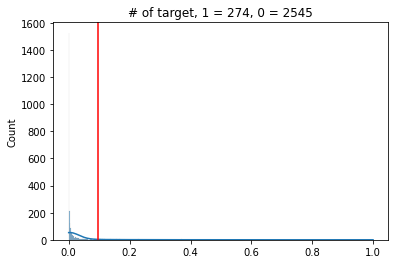

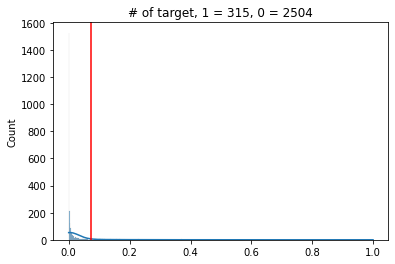

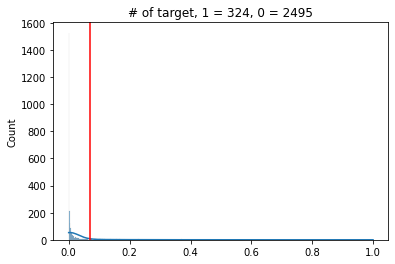

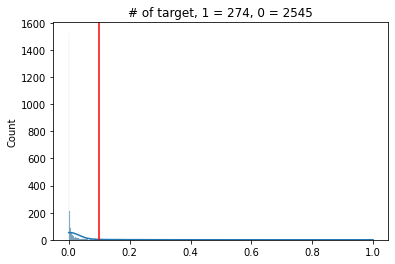

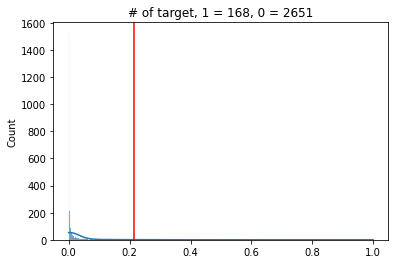

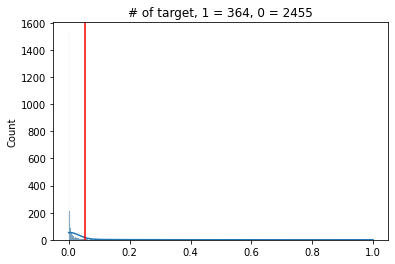

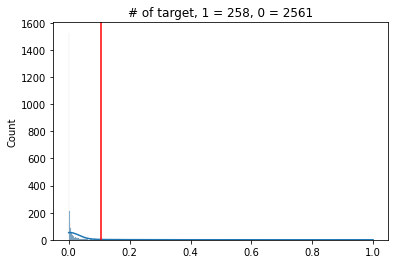

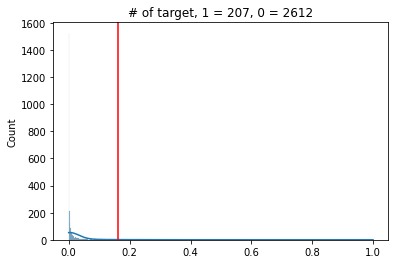

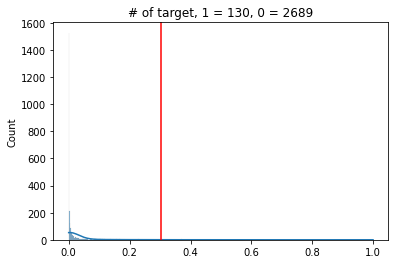

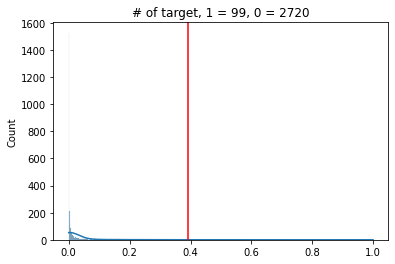

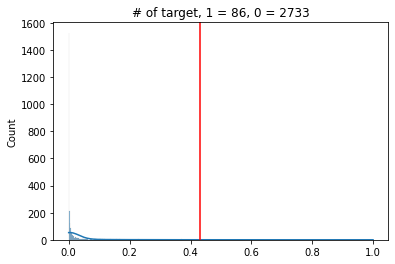

In [ ]:
def explore_threshold(y_true, y_pred_proba, threshold = 0.5):
  y_pred = y_pred_proba >= threshold
  vc = pd.Series(y_pred).value_counts()
  ax = sns.histplot(y_pred_proba, kde = True)
  ax.axvline(threshold, color = 'red')
  ax.set_title(f'# of target, 1 = {vc[1]}, 0 = {vc[0]}')
  plt.show()
  print(classification_report(y_true, y_pred))

interact(
    explore_threshold,
    y_true = fixed(y_val),
    y_pred_proba = fixed(y_pred_proba),
    threshold = (0, 0.5, 0.001)
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, max_depth = 10, n_jobs = -1)
forest.fit(X_train_encoded, y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1)

In [ ]:
y_pred_forest = forest.predict_proba(X_val_encoded)[:, 1]
interact(
    explore_threshold,
    y_true = fixed(y_val),
    y_pred_proba = fixed(y_pred_forest),
    threshold = (0, 1, 0.001)
)

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.001), Output()), _dom_cl…

<function __main__.explore_threshold(y_true, y_pred_proba, threshold=0.5)>

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
def zeroone(list):
  new_list = []
  for result in list:
    if result == False:
      new_list.append(0)
    else:
      new_list.append(1)
  return np.array(new_list)


In [ ]:
index = test['ID']
test = test.drop(columns = ['ID'])
test_encoded = encoder.transform(test)
test_proba = forest.predict_proba(test_encoded)[:, 1]
thresh = 0.18
test_thresh = test_proba > thresh
test_zeroone = zeroone(test_thresh)
pd.DataFrame(
    {'ID' : index, 
     'Y_LABEL' : test_zeroone}
).to_csv('test_first_try.csv', index = False)

In [ ]:
val_proba = forest.predict_proba(X_val_encoded)[:, 1]
thresh = 0.2
val_thresh = val_proba > thresh
val_zeroone = zeroone(val_thresh)
print(classification_report(y_val, val_zeroone))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2578
           1       0.33      0.14      0.19       241

    accuracy                           0.90      2819
   macro avg       0.63      0.56      0.57      2819
weighted avg       0.87      0.90      0.88      2819



In [ ]:
X_train_encoded

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
12803,1,5001,2011,200,0,0,6,2,42,0.0,1,20,0,28,0,0,82.9,953
12279,2,2339,2013,200,0,0,0,0,23,0.0,0,3,0,15,0,0,73.6,1279
6680,3,2488,2012,200,0,0,3,4,179,0.0,1,1,0,209,0,0,147.3,28
12131,3,3870,2015,200,0,0,17,3,997,0.0,11,0,0,1319,0,0,135.8,33
845,3,2855,2010,200,0,0,9,41,833,0.4,13,0,2,90,0,0,145.7,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,4,2883,2009,200,0,0,0,102,5,0.0,0,0,0,94,0,0,41.4,632
4659,3,2155,2018,550,0,0,2,4,136,0.0,2,2,0,195,0,0,120.7,107
9481,4,5599,2012,200,0,0,2,4,19,0.0,0,0,0,25,0,0,67.4,212
5802,3,1372,2009,572,0,0,5,1,167,0.0,3,0,1,244,0,0,146.5,13


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal = True).to_notebook_iframe()

In [ ]:
from scipy.stats import randint, uniform
from sklearn.feature_selection import SelectKBest

In [ ]:
pipeline = make_pipeline(
    SelectKBest(),
    RandomForestClassifier(n_jobs = -1)
)

dists = {
    'selectkbest__k': range(1, len(X_train.columns)+1),
    'randomforestclassifier__n_estimators' : randint(50, 500),
    'randomforestclassifier__max_depth' : [5, 10, 15, None]
}
clf = RandomizedSearchCV(
    pipeline,
    param_distributions = dists,
    n_iter = 50,
    cv = 3,
    scoring = 'f1_macro',
    verbose=1,
    n_jobs = -1
)
clf.fit(X_train_encoded, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              15,
                                                                              None],
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f715c8edc70>,
                                        'selectkbest__k': range(1, 19)},
                   scoring='f1_macro', verbose=1)

In [ ]:
clf.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__n_estimators': 333,
 'selectkbest__k': 4}

In [ ]:
clf.best_score_

0.5297726150879196

In [ ]:
val_pred_clf = clf.best_estimator_.predict(X_val_encoded)
print(classification_report(y_val, val_pred_clf))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2578
           1       0.27      0.04      0.07       241

    accuracy                           0.91      2819
   macro avg       0.59      0.52      0.51      2819
weighted avg       0.86      0.91      0.88      2819



In [ ]:
val_clf_predict_proba = clf.predict_proba(X_val_encoded)[:, -1]
interact(
    explore_threshold,
    y_true = fixed(y_val),
    y_pred_proba = fixed(val_clf_predict_proba),
    threshold = (0, 0.2, 0.001)
)

In [ ]:
xgb_pipe = make_pipeline(
    SelectKBest(),
    XGBClassifier()
)

params = {
    'selectkbest__k': range(1, len(X_train.columns)+1),
    'xgbclassifier__n_estimators': [1000, 2000, 3000, 4000, 5000],
    'xgbclassifier__max_depth':[3, 4, 5, 6, 7, 8, 10],
    'xgbclassifier__learning_rate':[0.1, 0.2, 0.3],
    'xgbclassifier__scale_pos_weight':[0.89, 0.9, 0.91, 0.92],
    'xgbclassifier__n_jobs':[-1],
    'xgbclassifier__early_stopping_rounds' : [40, 50, 60]
}

xgb_clf = RandomizedSearchCV(
    xgb_pipe,
    param_distributions = params,
    n_iter = 50,
    cv = 3,
    scoring = 'f1_macro',
    verbose=1,
    n_jobs = -1
)
xgb_clf.fit(X_train_encoded, y_train)
xgb_val_pred_clf = xgb_clf.best_estimator_.predict(X_val_encoded)
print(classification_report(y_val, xgb_val_pred_clf))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2578
           1       0.22      0.09      0.12       241

    accuracy                           0.90      2819
   macro avg       0.57      0.53      0.53      2819
weighted avg       0.86      0.90      0.87      2819



In [ ]:
print(classification_report(y_val, xgb_val_pred_clf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2578
           1       0.22      0.09      0.12       241

    accuracy                           0.90      2819
   macro avg       0.57      0.53      0.53      2819
weighted avg       0.86      0.90      0.87      2819



interactive(children=(FloatSlider(value=0.5, description='threshold', max=0.5, step=0.001), Output()), _dom_cl…

<function __main__.explore_threshold(y_true, y_pred_proba, threshold=0.5)>

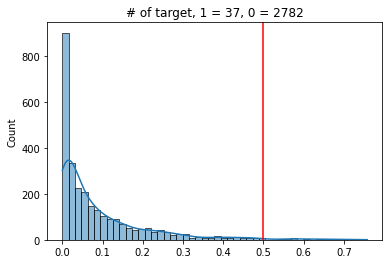

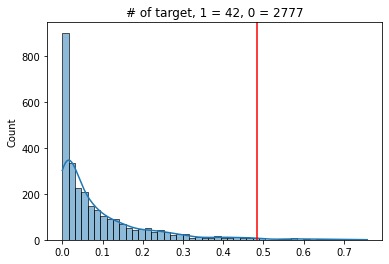

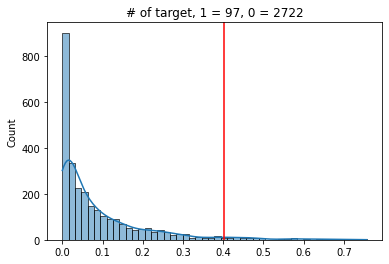

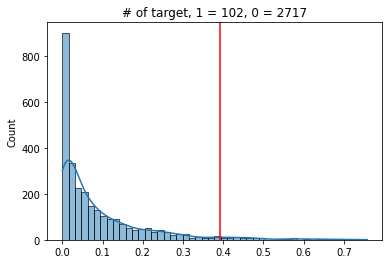

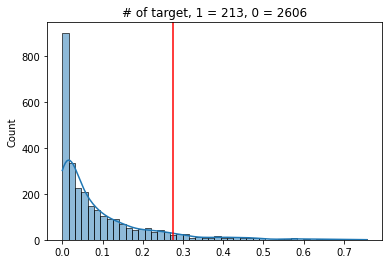

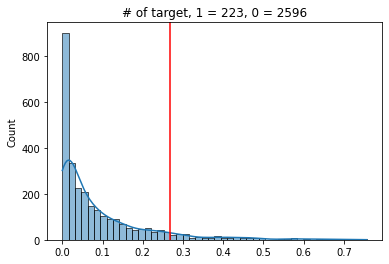

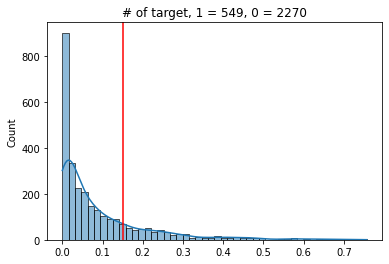

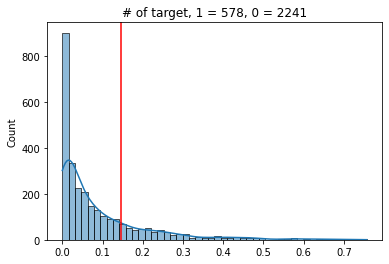

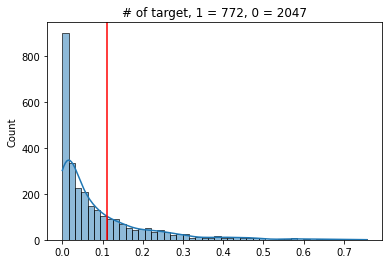

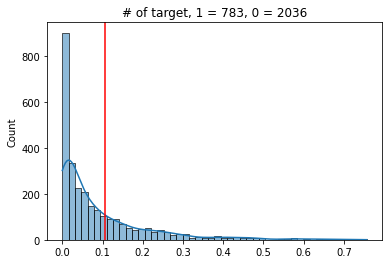

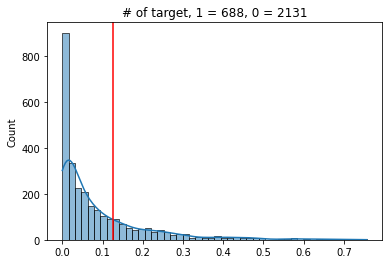

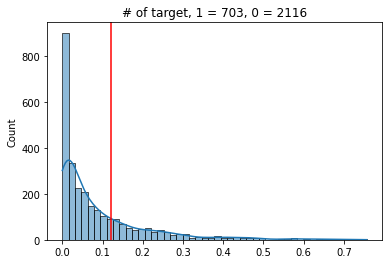

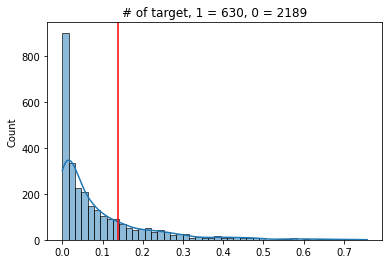

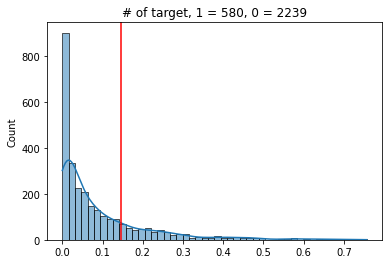

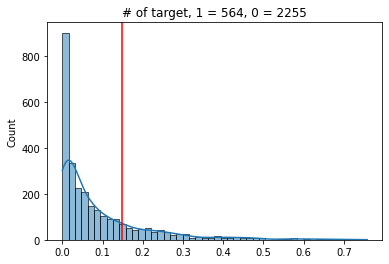

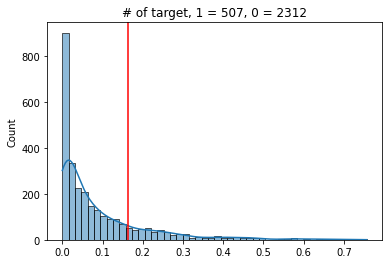

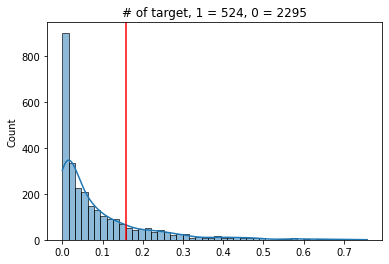

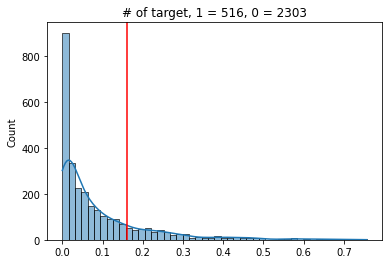

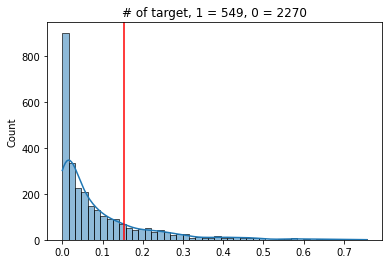

In [ ]:
xgb_val_predict_proba = xgb_clf.predict_proba(X_val_encoded)[:, -1]
interact(
    explore_threshold,
    y_true = fixed(y_val),
    y_pred_proba = fixed(val_clf_predict_proba),
    threshold = (0, 0.5, 0.001)
)

In [ ]:
xgb_test_proba = xgb_clf.predict_proba(test_encoded)[:, 1]
thresh = 0.15
xgb_test_thresh = xgb_test_proba > thresh
xgb_test_zeroone = zeroone(xgb_test_thresh)
pd.DataFrame(
    {'ID' : index, 
     'Y_LABEL' : xgb_test_zeroone}
).to_csv('test_second_try.csv', index = False)